In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
from tensorflow.keras.models import Sequential


In [2]:
data_train = "data/train"
data_test = "data/test"
data_val = "data/val"

## IMAGE PREPROCESSING

In [3]:
img_size =150

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_train, 
    shuffle=True, 
    image_size=(img_size, img_size),
    batch_size=32,
    label_mode='int'  # or 'categorical' based on your labels
)

# Load validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_val, 
    shuffle=True, 
    image_size=(img_size, img_size),
    batch_size=32,
    label_mode='int'
)

# Load test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_test, 
    shuffle=False,  # typically, you don't need to shuffle the test dataset
    image_size=(img_size, img_size),
    batch_size=32,
    label_mode='int'
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [9]:
data_class=train_dataset.class_names

In [20]:
for images, labels in train_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 150, 150, 3)
Label batch shape: (32,)


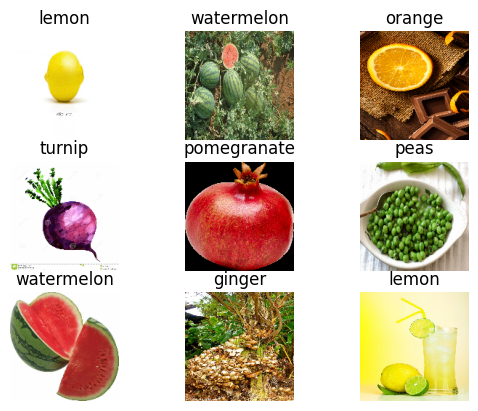

In [18]:
plt.figure(figure=(15,15))
for image,labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_class[labels[i]])
        plt.axis('off')
        


# MODEL TRAINING

In [23]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))


model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(36, activation='softmax'))


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │        18,468 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,568,228 (21.24 MB)

 Trainable params: 5,568,228 (21.24 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(train_dataset,validation_data=validation_dataset,epochs=10,batch_size=32)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 446ms/step - accuracy: 0.8693 - loss: 0.4303 - val_accuracy: 0.9316 - val_loss: 0.3495
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 515ms/step - accuracy: 0.8706 - loss: 0.4287 - val_accuracy: 0.9202 - val_loss: 0.3216
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.8890 - loss: 0.3569 - val_accuracy: 0.9430 - val_loss: 0.2616
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - accuracy: 0.9104 - loss: 0.3132 - val_accuracy: 0.9516 - val_loss: 0.2635
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.9245 - loss: 0.2616 - val_accuracy: 0.9459 - val_loss: 0.3564
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 414ms/step - accuracy: 0.9142 - loss: 0.2717 - val_accuracy: 0.9516 - val_loss: 0.3062
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step - accuracy: 0.9180 - loss: 0.2630 - val_accuracy: 0.9573 - val_loss: 0.2566
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 407ms/step - accuracy: 0.9275 - loss: 0.2168 - val_accu

In [79]:
img = "DATA/test/garlic/Image_10.jpg"
im = tf.keras.utils.load_img(img, target_size=(img_size, img_size))
img_arr = tf.keras.utils.img_to_array(im)  
img_bat = tf.expand_dims(img_arr, axis=0)

In [80]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [81]:
print('It\'s a {} with accuracy {:0.2f}%'.format(data_class[np.argmax(score)], np.max(score) * 100))

It's a garlic with accuracy 7.21%
